<a href="https://colab.research.google.com/github/MohammadErfanRashidi/Credit-Score-Classification-/blob/main/Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [92]:
# Uploading df
df = pd.read_csv('/content/train.csv')

In [93]:
# Head
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [94]:
# Shape
df.shape

(100000, 28)

In [95]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [96]:
# Missing values
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [97]:
# Describe
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [98]:
# All columns
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [99]:
# Credit_Score value counts
df['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


<Axes: xlabel='count', ylabel='Credit_Score'>

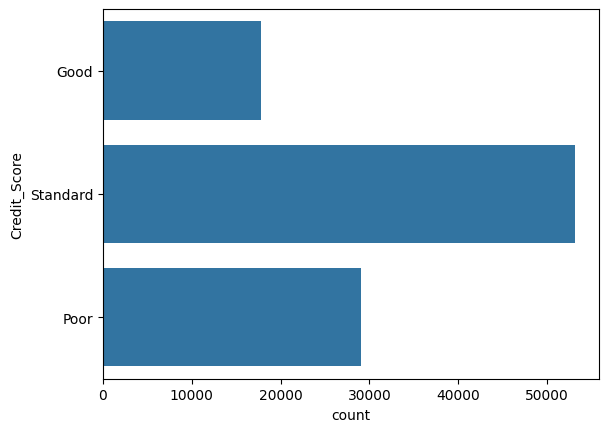

In [100]:
# Plotting
sns.countplot(df['Credit_Score'])

<Axes: xlabel='Credit_Score', ylabel='Age'>

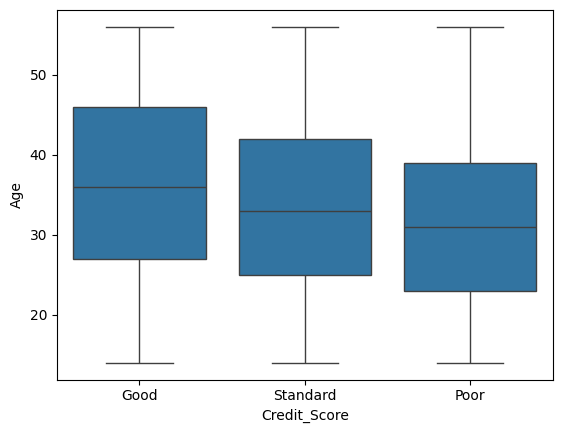

In [101]:
# Plotting Age and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Age', data=df)

<Axes: xlabel='Credit_Score', ylabel='Annual_Income'>

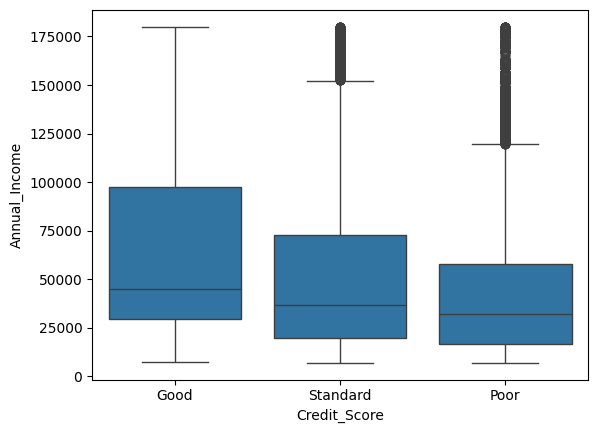

In [102]:
# Plotting Annual_Income and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df)

<Axes: xlabel='Credit_Score', ylabel='Occupation'>

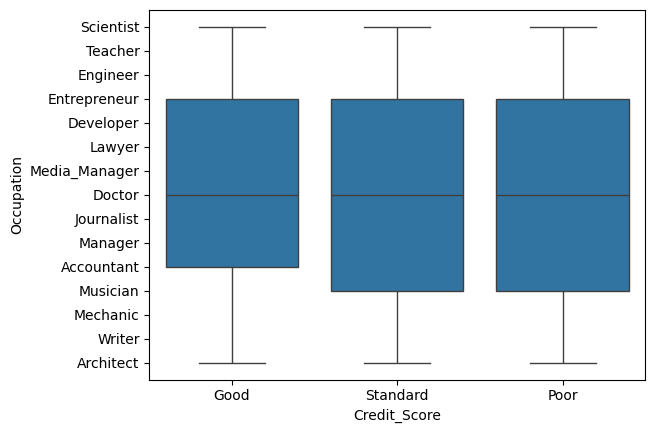

In [103]:
# Plotting Occupation and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Occupation', data=df)

<Axes: xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

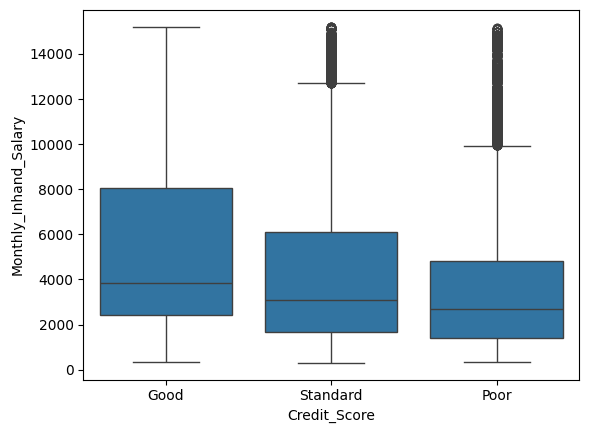

In [104]:
# Plotting Monthly_Inhand_Salary and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df)

<Axes: xlabel='Credit_Score', ylabel='Interest_Rate'>

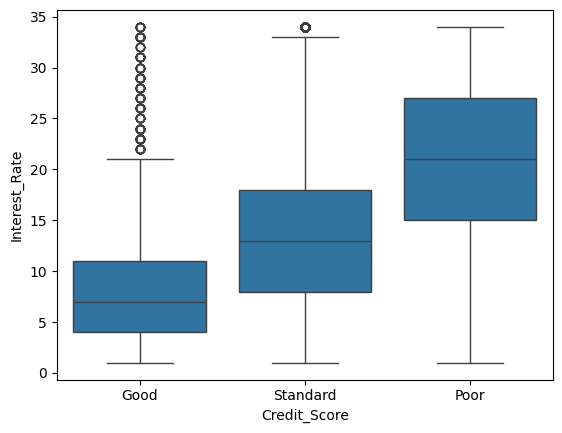

In [105]:
# Plotting Interest_Rate and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df)

<Axes: xlabel='Credit_Score', ylabel='Monthly_Balance'>

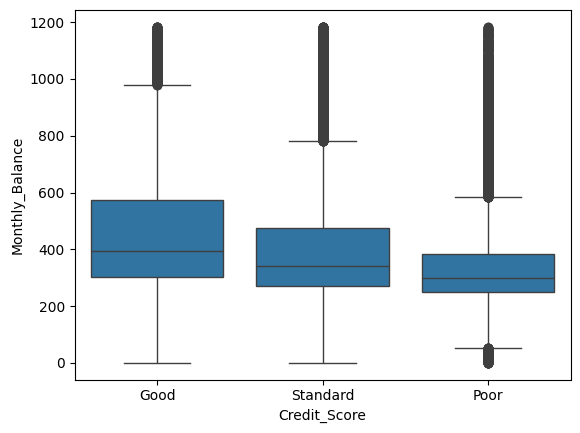

In [106]:
# Plotting Monthly_Balance and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df)

<Axes: xlabel='Credit_Score', ylabel='Num_Bank_Accounts'>

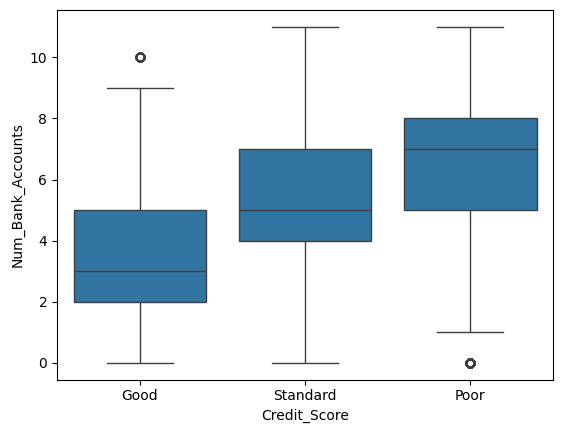

In [107]:
# Plotting Num_Bank_Accounts and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df)

<Axes: xlabel='Credit_Score', ylabel='Num_Credit_Card'>

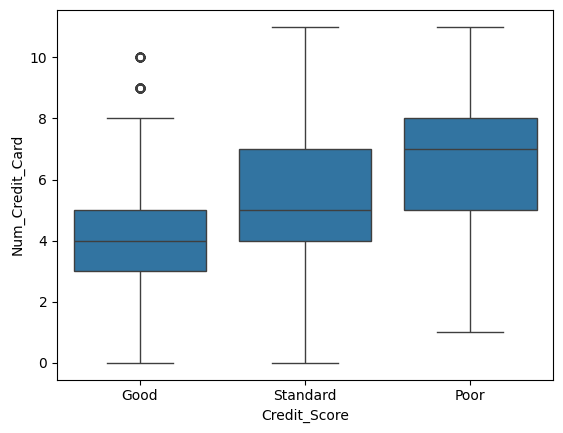

In [108]:
# Plotting Num_Credit_Card and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Num_Credit_Card', data=df)

<Axes: xlabel='Credit_Score', ylabel='Num_of_Loan'>

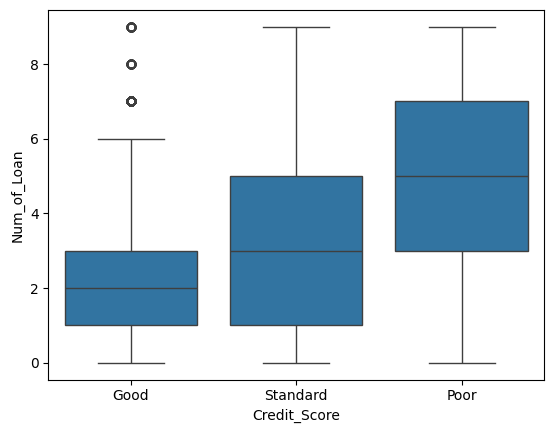

In [109]:
# Plotting Num_of_Loan and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Num_of_Loan', data=df)

<Axes: xlabel='Credit_Score', ylabel='Delay_from_due_date'>

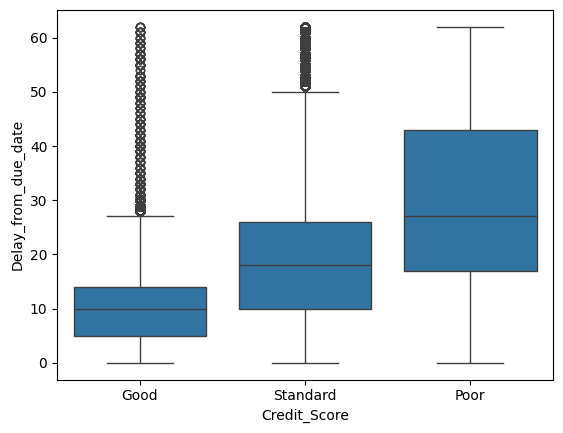

In [110]:
# Plotting Delay_from_due_date and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df)

<Axes: xlabel='Credit_Score', ylabel='Num_of_Delayed_Payment'>

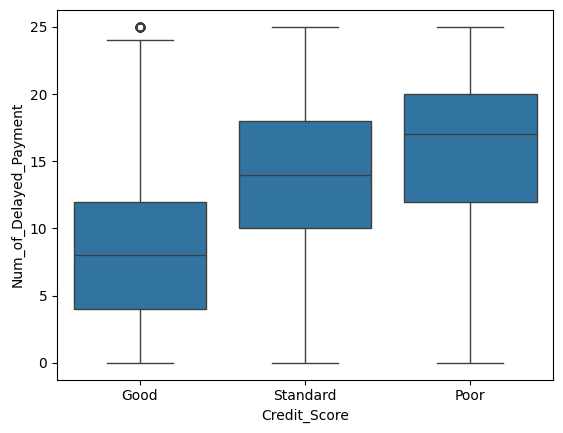

In [111]:
# Plotting Num_of_Delayed_Payment and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df)

<Axes: xlabel='Credit_Score', ylabel='Changed_Credit_Limit'>

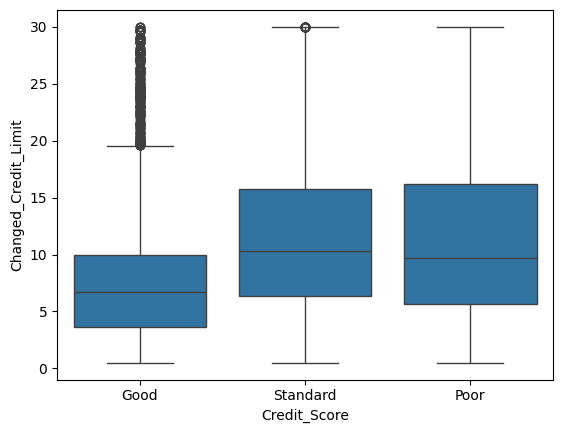

In [112]:
# Plotting Changed_Credit_Limit and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Changed_Credit_Limit', data=df)

<Axes: xlabel='Credit_Score', ylabel='Num_Credit_Inquiries'>

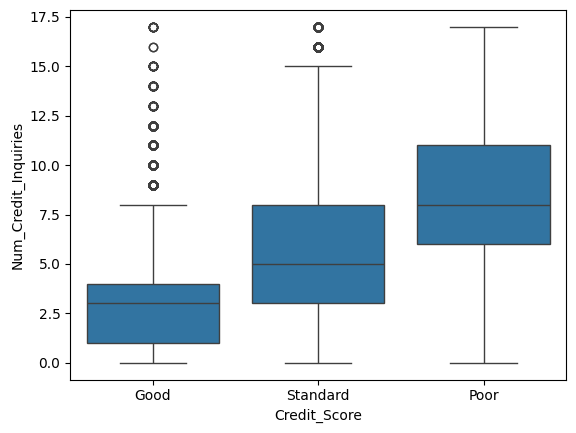

In [113]:
# Plotting Num_Credit_Inquiries and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Num_Credit_Inquiries', data=df)

<Axes: xlabel='Credit_Score', ylabel='Outstanding_Debt'>

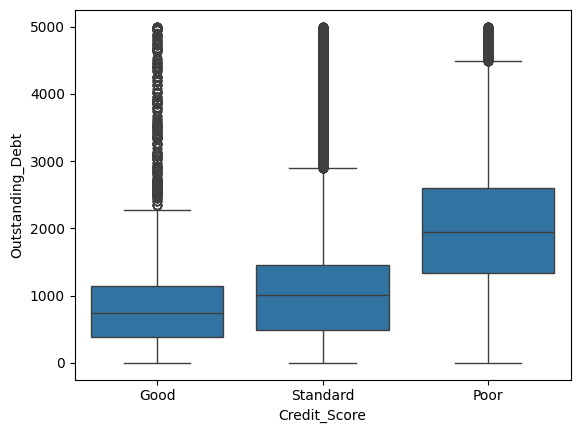

In [114]:
# Plotting Outstanding_Debt and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df)

<Axes: xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

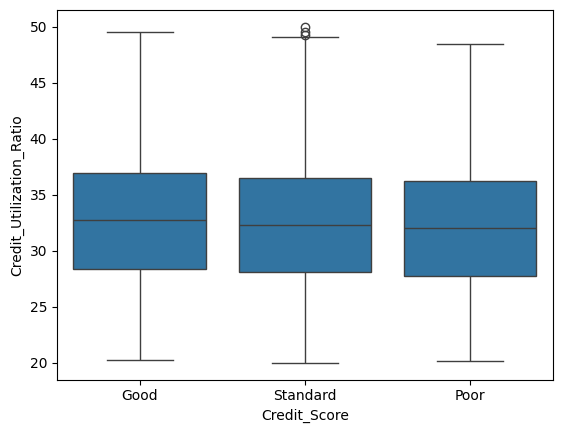

In [115]:
# Plotting Credit_Utilization_Ratio and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df)

<Axes: xlabel='Credit_Score', ylabel='Credit_History_Age'>

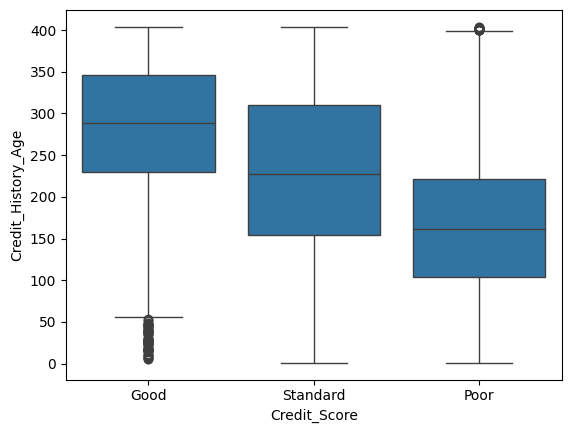

In [116]:
# Plotting Credit_History_Age and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df)

<Axes: xlabel='Credit_Score', ylabel='Amount_invested_monthly'>

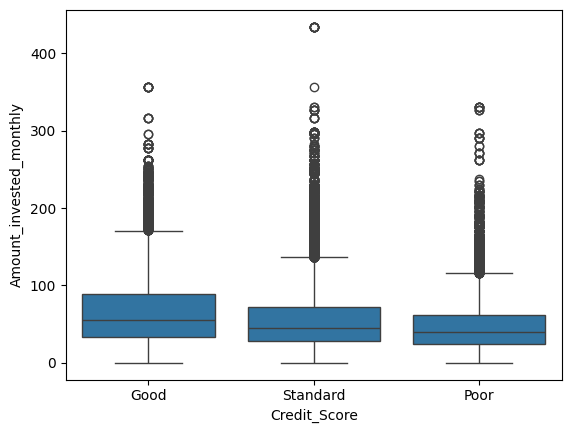

In [117]:
# Plotting Amount_invested_monthly and Credit_Score with boxes
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=df)

In [133]:
# Credit_Score
df['Credit_Score'] = df['Credit_Score'].replace({'Poor': 0, 'Standard': 1, 'Good': 2})
# Credit_Mix
df['Credit_Mix'] = df['Credit_Mix'].map({'Bad': 1, 'Standard': 2, 'Good': 3})

In [137]:
# Seperating data and Credit_Score dropping Name
X = np.array(df[["Annual_Income", "Monthly_Inhand_Salary",
                   "Num_Bank_Accounts", "Num_Credit_Card",
                   "Interest_Rate", "Num_of_Loan",
                   "Delay_from_due_date", "Num_of_Delayed_Payment",
                   "Credit_Mix", "Outstanding_Debt",
                   "Credit_History_Age", "Monthly_Balance"]])
Y = np.array(df[["Credit_Score"]])

In [138]:
print(X)

[[1.91141200e+04 1.82484333e+03 3.00000000e+00 ... 8.09980000e+02
  2.65000000e+02 3.12494089e+02]
 [1.91141200e+04 1.82484333e+03 3.00000000e+00 ... 8.09980000e+02
  2.66000000e+02 2.84629162e+02]
 [1.91141200e+04 1.82484333e+03 3.00000000e+00 ... 8.09980000e+02
  2.67000000e+02 3.31209863e+02]
 ...
 [3.96289900e+04 3.35941583e+03 4.00000000e+00 ... 5.02380000e+02
  3.80000000e+02 5.16809083e+02]
 [3.96289900e+04 3.35941583e+03 4.00000000e+00 ... 5.02380000e+02
  3.81000000e+02 3.19164979e+02]
 [3.96289900e+04 3.35941583e+03 4.00000000e+00 ... 5.02380000e+02
  3.82000000e+02 3.93673696e+02]]


In [139]:
print(Y)

[[2]
 [2]
 [2]
 ...
 [0]
 [1]
 [0]]


In [140]:
# Train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [148]:
# Model
model = RandomForestClassifier()

In [149]:
# Fitting the model
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [150]:
# Model evaluation
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.999955223880597


In [153]:
print("Credit Score Prediction : ")
a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Interest rate: "))
f = float(input("Number of Loans: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
i = input("Credit Mix (Bad: 0, Standard: 1, Good: 3) : ")
j = float(input("Outstanding Debt: "))
k = float(input("Credit History Age: "))
l = float(input("Monthly Balance: "))

features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l]])

if model.predict(features) == 0:
    print("Poor Credit Score")
elif model.predict(features) == 1:
    print("Standard Credit Score")
else:
    print("Good Credit Score")

Credit Score Prediction : 
Annual Income: 19113
Monthly Inhand Salary: 1824
Number of Bank Accounts: 2
Number of Credit cards: 2
Interest rate: 9
Number of Loans: 2
Average number of days delayed by the person: 12
Number of delayed payments: 3
Credit Mix (Bad: 0, Standard: 1, Good: 3) : 3
Outstanding Debt: 250
Credit History Age: 200
Monthly Balance: 310
Good Credit Score
